In [109]:
%load_ext autoreload
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.debugger import Pdb
from sklearn.metrics import roc_curve

import experiment.top_30_class as experiment
from evaluator import Evaluator
from label_handler import LabelHandler
from video_handler import VideoViewer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


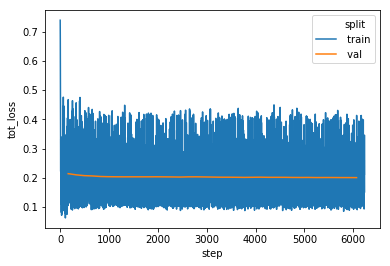

In [4]:
learning_stat = pd.read_csv("../experiment/top_30_class/train_log.csv")
sns.lineplot(x="step", y="tot_loss", hue="split", data=learning_stat)

In [5]:
ave = learning_stat["tot_loss"].rolling(window=10,min_periods=1).mean()
train_loss = ave.values

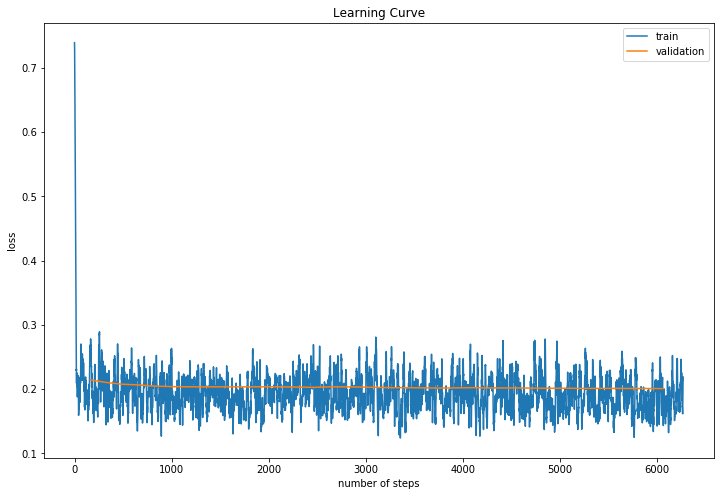

In [90]:
train_loss = learning_stat[learning_stat["split"] == " train"]
val_loss = learning_stat[learning_stat["split"] == " val"]
train_loss_MA = learning_stat["tot_loss"].rolling(window=10,min_periods=1).mean()
train_loss_y = train_loss_MA.values
val_loss_x = val_loss["step"]
val_loss_y = val_loss["tot_loss"]
plt.figure(figsize=(12,8))
plt.plot(train_loss_y, label="train")
plt.plot(val_loss_x, val_loss_y, label="validation")
plt.xlabel("number of steps")
plt.ylabel("loss")
plt.legend()
plt.title("Learning Curve")
plt.savefig("../experiment/top_30_class/figures/learning_step.pdf")

In [12]:
evaluator = Evaluator()
label_handler = LabelHandler("experiment/top_30_class/index.csv")
label_handler.expand_index()
evaluator.load_result("../experiment/top_30_class/result_with_video.pkl")
evaluator.stats_setup()

棒グラフの出力
[("man", 0.444444, 0.222222), ("woman", 0.774444, 0.322222)]
を作って
plt.bar
plt.bar
plt.xtick
みたいな感じでつくる

In [8]:
evaluator.accuracy()

array([ 0.97508897,  0.97864769,  0.93594306,  0.95017794,  0.96085409,
        0.95373665,  0.9252669 ,  0.93238434,  0.87188612,  1.        ,
        0.96085409,  0.7544484 ,  0.97864769,  0.97864769,  0.97864769,
        0.96797153,  0.97508897,  0.88967972,  0.80782918,  0.98932384])

In [81]:
acc = evaluator.accuracy()
auc = evaluator.auc()
label_count = label_handler.label_count()

In [82]:
score_matrix = evaluator.score_matrix
true_label_matrix = evaluator.label_matrix
predicted = evaluator.score_matrix >= 0.5

In [83]:
# calculate true positive rate when false positive rate = threshold
tpr_list = []
thres = 0.3
for i in range(score_matrix.shape[1]):
    true_label = true_label_matrix[:, i]
    score = score_matrix[:, i]
    fpr,tpr, threshold = roc_curve(true_label, score)
    for i in range(len(fpr)):
        if (fpr[i] <= thres and fpr[i + 1] >= thres):
            tpr_list.append(tpr[i])

In [84]:
bar_plot_data = zip(experiment.mlb.classes_, tpr_list, auc)
bar_plot_data = sorted(bar_plot_data, key=lambda k: label_count[k[0]], reverse=True)

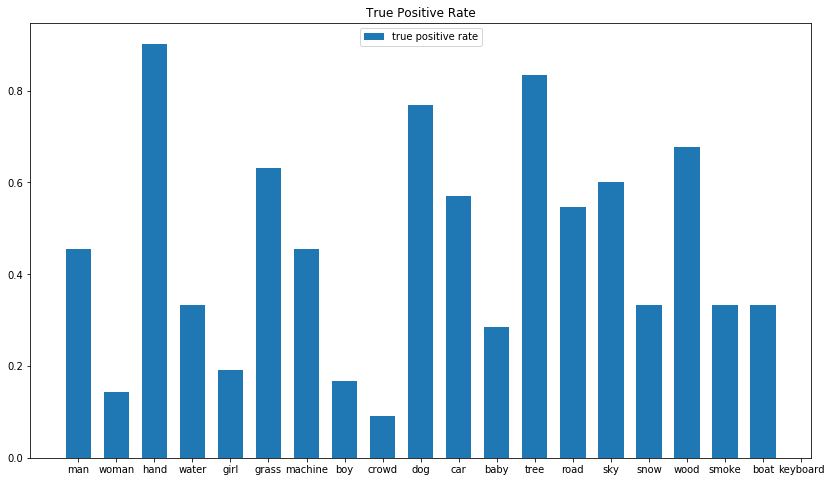

In [162]:
x = np.arange(len(bar_plot_data)) * 1.2
labels = list(map(lambda d:d[0], bar_plot_data))
tpr = np.array(list(map(lambda d:d[1], bar_plot_data))).astype(np.float)
auc = np.array(list(map(lambda d:d[2], bar_plot_data))).astype(np.float)
plt.figure(figsize=(14,8))
plt.bar(x, tpr, label="true positive rate")
plt.xticks(x,labels)
plt.legend()
plt.title("True Positive Rate")
plt.savefig("../experiment/top_30_class/figures/true_positive_rate.pdf")

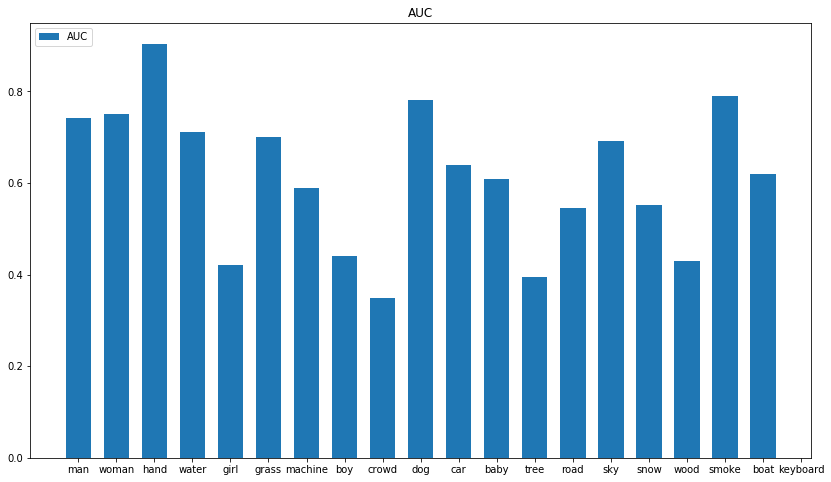

In [160]:
plt.figure(figsize=(14,8))
plt.bar(x, auc, label="AUC")
plt.xticks(x,labels)
plt.title("AUC")
plt.legend()
plt.savefig("../experiment/top_30_class/figures/AUC.pdf")

In [71]:
bar_plot_data

[('man', 0.45454545454545453, 0.6084462982273201),
 ('woman', 0.14285714285714285, 0.61878787878787878),
 ('hand', 0.90243902439024393, 0.34848484848484851),
 ('water', 0.33333333333333331, 0.79090909090909089),
 ('girl', 0.19047619047619047, 0.58956228956228951),
 ('grass', 0.63157894736842102, 0.44000844951415297),
 ('machine', 0.45454545454545453, 0.63937934724451584),
 ('boy', 0.16666666666666666, 0.90436991869918693),
 ('crowd', 0.090909090909090912, 0.4206959706959707),
 ('dog', 0.76923076923076927, 0.7002812374447569),
 ('car', 0.5714285714285714, 0.71045161290322578),
 ('baby', 0.2857142857142857, 0.74218009478673008),
 ('tree', 0.83333333333333337, 0.4304556354916067),
 ('road', 0.54545454545454541, 0.39572471324296143),
 ('sky', 0.59999999999999998, 0.54606060606060614),
 ('snow', 0.33333333333333331, 0.55269607843137258),
 ('wood', 0.67741935483870963, None),
 ('smoke', 0.33333333333333331, 0.69272727272727275),
 ('boat', 0.33333333333333331, 0.74966898378020519)]

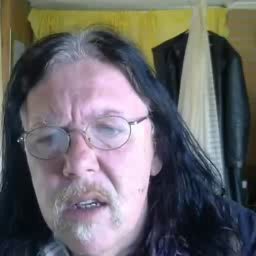

In [147]:
sample_idx = 6
sample_path = evaluator.result[sample_idx]["video"]
VideoViewer(sample_path).image_as_PIL(0)

In [148]:
prediction = zip(experiment.mlb.classes_, score_matrix[sample_idx])
position = sorted(prediction, key=lambda key: key[1], reverse=True)
list(position)

[('man', 0.35170364),
 ('woman', 0.29584759),
 ('hand', 0.13976569),
 ('water', 0.080240659),
 ('girl', 0.057961062),
 ('crowd', 0.0557376),
 ('dog', 0.049526382),
 ('baby', 0.048524685),
 ('boy', 0.047863249),
 ('machine', 0.039908428),
 ('grass', 0.039490659),
 ('car', 0.037801336),
 ('road', 0.030801313),
 ('sky', 0.026903771),
 ('keyboard', 0.026639931),
 ('tree', 0.025738589),
 ('snow', 0.022837551),
 ('wood', 0.021249315),
 ('smoke', 0.018519152),
 ('boat', 0.015560045)]

In [ ]:
fpr,tpr, threshold = roc_curve(true_label_matrix[:,11], score_matrix[:, 11])
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1), np.linspace(0,1))
ax = plt.gca()
ax.set_aspect("equal", "box")